# Laboratory Exercise 1 - Starter (2 points)

In this assignment, you will perform **web scraping** on the website [https://books.toscrape.com/](https://books.toscrape.com/).

Your tasks are as follows:

1. **Extract** `image_url`, `rating`, `title`, and `price` for the 20 books displayed on the main page.
2. **Organize the data** into a **pandas.DataFrame**.
3. **Visualize** the collected data according to the given requirements.

**Notes:**

- Some parts of the code are already provided. **Do not modify the existing code.**
- **Do not hard-code** any values or test data. There are hidden tests that will check your implementation.
- Write your solution only in the sections marked with `### YOUR SOLUTION`.
- Each task description indicates whether it is **automatically** or **manually graded**.
- You can verify automatically graded tasks using the cell labeled `### TEST` after each function.

***IMPORTANT NOTE:***
- Name your Jupyter Notebook as `lab_ex_1_{index}.ipynb`.
- For example, if your index is 123456, you should name your notebook as `lab_ex_1_12346.ipynb`.

In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [6]:
url = "https://books.toscrape.com/"

In [9]:
response = requests.get(url)

In [11]:
page_element = BeautifulSoup(response.text, "html.parser")

In [12]:
product_elements = page_element.select("article.product_pod")

**(0.2 points)** Implement the `get_image_url` function to return the image URL of a given product element using **BeautifulSoup**. For example, the first product on the page has the image URL `"media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"`.

In [26]:
### AUTOMATICALLY GRADED TASK
def get_image_url(product_element):
    "Get the URL of the image from the given product element using BeautifulSoup."

    img_el = product_element.select_one(".image_container img")

    return img_el["src"]

Test your implementation by running the following cell.

In [27]:
### TEST
assert get_image_url(product_elements[0]) == "media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"

**(0.2 points)** Implement the `get_rating` function to return the product’s rating as an integer between 1 and 5. For example, the first product on the page has a rating of `3`.

In [50]:
### AUTOMATICALLY GRADED TASK
def get_rating(product_element):
    "Get the rating (1-5) of the given product element."

    RATINGS = { "One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5 }

    for cls, num in RATINGS.items():
        if product_element.select_one("." + cls) != None:
            return num
        
    return 0 # Default

Test your implementation by running the following cell.

In [51]:
### TEST
assert get_rating(product_elements[0]) == 3

**(0.2 points)** Implement the `get_title` function to return the full title of the given product as a string. For example, the first product on the page has the title `"A Light in the Attic"`.

In [54]:
### AUTOMATICALLY GRADED TASK
def get_title(product_element):
    "Get the full-length title of the given product element."

    return product_element.select_one("h3 a")["title"]


Test your implementation by running the following cell.

In [55]:
### TEST
assert get_title(product_elements[0]) == "A Light in the Attic"

**(0.2 points)** Implement the `get_price` function to return the product’s price as a float. For example, the first product on the page has a price of `51.77`.

In [67]:
def get_price(product_element):
    "Get the price of the given product element."

    txt = product_element.select_one(".price_color").text
    txt = txt[txt.find("£")+1:]
    return float(txt)

    

Test your implementation by running the following cell.

In [68]:
### TEST
assert get_price(product_elements[0]) == 51.77

In [70]:
def get_attributes(product_element):
    return {
        "image_url": get_image_url(product_element),
        "rating": get_rating(product_element),
        "title": get_title(product_element),
        "price": get_price(product_element),
    }

In [71]:
get_attributes(product_elements[0])

{'image_url': 'media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg',
 'rating': 3,
 'title': 'A Light in the Attic',
 'price': 51.77}

In [72]:
product_data = [get_attributes(product_element) for product_element in product_elements]

In [73]:
df = pd.DataFrame(product_data)

In [74]:
df.head()

,image_url,rating,title,price
0,media/cache/2c/da/2cdad67c44b002e7ead0cc35693c...,3,A Light in the Attic,51.77
1,media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f...,1,Tipping the Velvet,53.74
2,media/cache/3e/ef/3eef99c9d9adef34639f51066202...,1,Soumission,50.10
3,media/cache/32/51/3251cf3a3412f53f339e42cac213...,4,Sharp Objects,47.82
4,media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c...,5,Sapiens: A Brief History of Humankind,54.23


***If you were not able to complete the previous tasks successfully, you may uncomment the following line to continue with the next steps.***

In [ ]:
# df = pd.read_csv("products.csv")

**(0.2 points)** Create a visualization showing the number of products for each rating (1-5).

In [84]:
### MANUALLY GRADED TASK
def plot_counts_by_rating(df):
    "Plot the count of products by rating."""

    df["rating"].value_counts().sort_index().plot.bar()

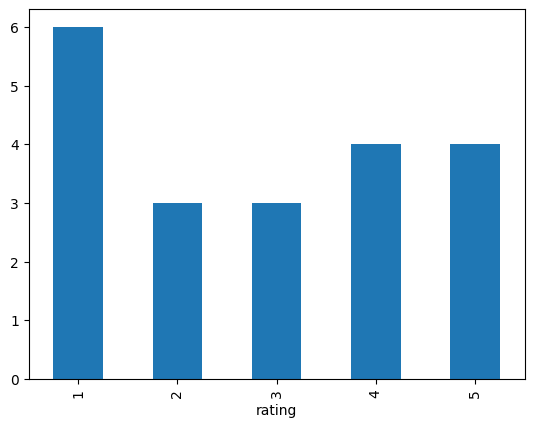

In [85]:
plot_counts_by_rating(df)

**(0.2 points)** Create a visualization showing the distribution of product prices.

In [ ]:
### MANUALLY GRADED TASK
def plot_price_distribution(df):
    """Plot the price distribution of the products."""

    # TODO ???

    # plt.boxplot(df["price"])

    plt.bar(df["title"], df["price"])
    plt.xticks(rotation=90)
    plt.show()

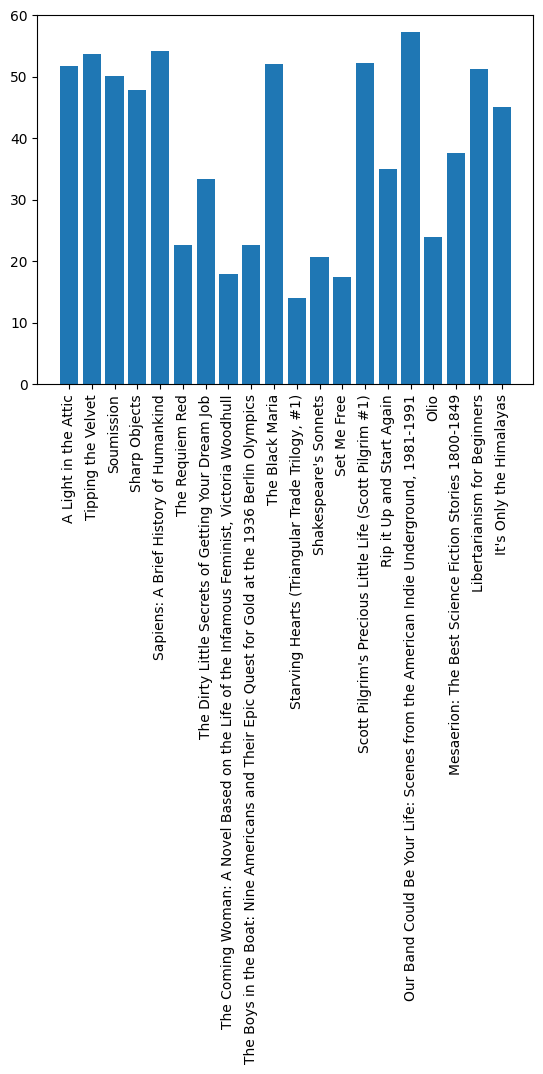

In [119]:
plot_price_distribution(df)

**(0.2 points)** Create a visualization showing the distribution of product title lengths.

In [137]:
### MANUALLY GRADED TASK
def plot_title_length_distribution(df):
    """Plot the distribution of the title lengths."""
 # ???? TODO
    df["title"].apply(lambda t: len(t)).value_counts().sort_index().plot.bar()


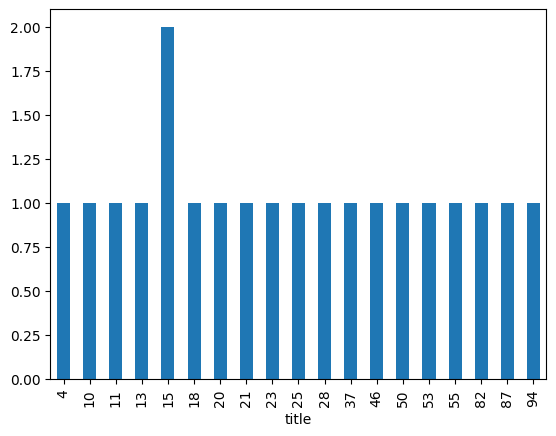

In [136]:
plot_title_length_distribution(df)


**(0.2 points)** Create box plots showing the distribution of product prices for each rating.

In [150]:
### MANUALLY GRADED ANSWER
def plot_price_distribution_per_rating(df):
    """Plot the price distribution of the products per rating."""

    sns.boxplot(df[["rating", "price"]], x="rating", y="price")

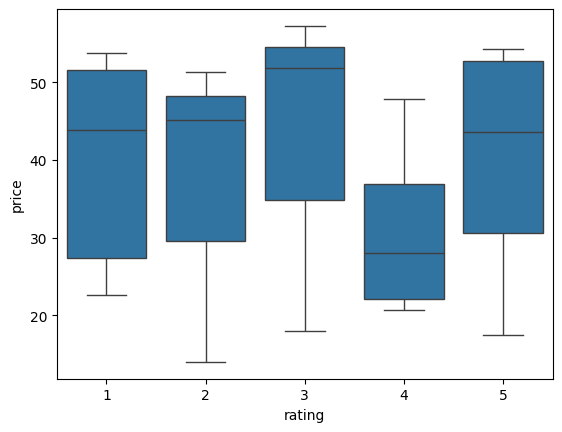

In [151]:
plot_price_distribution_per_rating(df)


**(0.2 points)** Create a heatmap showing the Pearson correlation between the numeric variables in the dataset.

In [158]:
### MANUALLY GRADED ANSWER
def plot_corr_heat_map(df):
    """Plot the Pearson correlation between the numeric variables in the dataset using a heat map."""

    sns.heatmap( df.corr('pearson', numeric_only=True), annot=True )


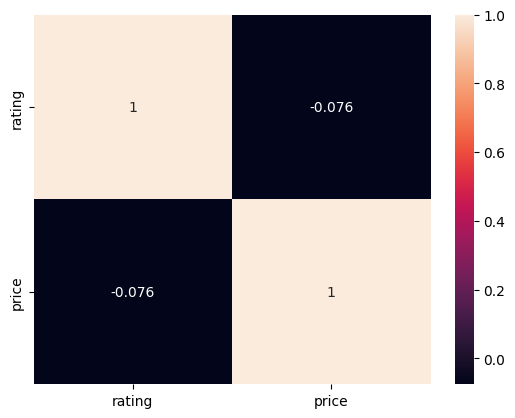

In [159]:
plot_corr_heat_map(df)

**(0.2 points)** Compute the `count`, `mean`, `std`, `min`, `25%`, `median`, `75%`, and `max` statistics of product prices grouped by rating (1-5).

In [175]:
### MANUALLY GRADED ANSWER
def compute_descriptive_stats_for_price_per_rating(df):
    """
    Compute the `count`, `mean`, `std`, `min`, `25% quantile`, `median`, `75% quantile`, and `max` statistics
    for the product's prices per rating (1-5). Return them as a `pandas.DataFrame`.
    """

    return df['rating'].describe()


In [176]:
compute_descriptive_stats_for_price_per_rating(df)

count    20.000000
mean      2.850000
std       1.565248
min       1.000000
25%       1.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64